> # Dimension reduction #
#### In many machine learning problem, lots of train set's features make training slow, and hard to search proper solution. This problem is called curse of dimention. So dimension reduction can be good idea to solve these problems. And it is useful at data visualization. ####

## 1. Projection ##
#### In most problem, train samples are not uniformly spreaded along all dimension. Many features are not changed, and some features are strongly connected each other. As a result, all train samples are located at low dimension subspace in high dimension space. Under picture is projection of 3 dimension data into 2 dimension space. ####

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings ; warnings.filterwarnings("ignore")

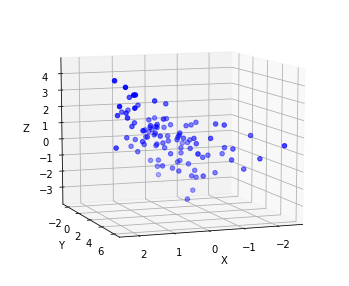

In [2]:
np.random.seed(119)
x = np.random.randn(100)
y = x**2 + np.random.randn(100)
z = x + 0.3*y + np.random.randn(100)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(10,70)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(x, y, z, c='b')

#### Project these points to x-y plane. ####

Text(0, 0.5, 'Y')

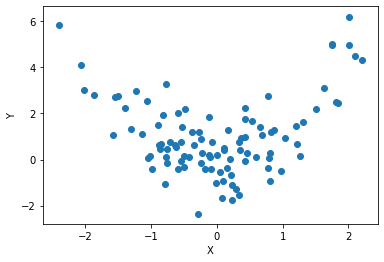

In [3]:
plt.scatter(x,y)
plt.xlabel("X"); plt.ylabel("Y")

#### Bot projection isn't always best way to dimensional reduction. ####

In [4]:
from sklearn.datasets import make_swiss_roll
x,y = make_swiss_roll(n_samples=500, noise=0.2)

Text(0.5, 0, 'X3')

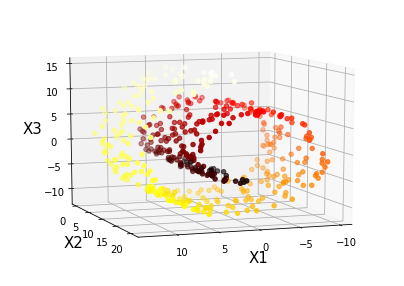

In [5]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x[:,0], x[:,1], x[:,2], c=y, cmap=plt.cm.hot)
ax.view_init(10,70)
ax.set_xlabel("X1", fontsize=15)
ax.set_ylabel("X2", fontsize=15)
ax.set_zlabel("X3", fontsize=15)

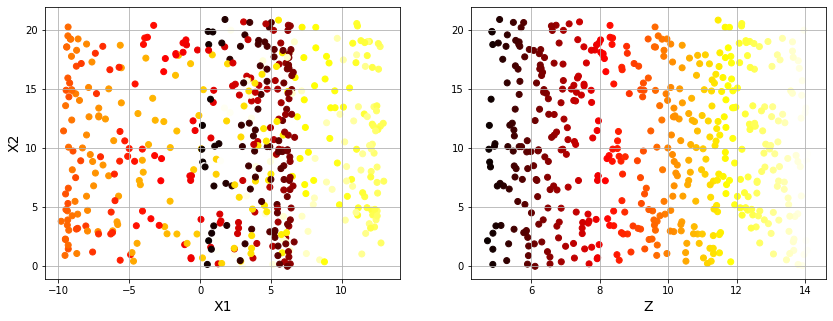

In [6]:
plt.figure(figsize=(14,5))

plt.subplot(121)
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.hot)
plt.xlabel("X1", fontsize=14); plt.ylabel("X2", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.scatter(y, x[:,1], c=y, cmap=plt.cm.hot)
plt.xlabel("Z", fontsize=14)
plt.grid(True)
plt.show()

#### Just projecting to plane makes points mixed up. We need new method to spread layers. ####

#### Swiss roll is an example of 2D manifold. It is 2D shape curved in 3D space. Many dimensional reduction algorithm works to train manifold data. This idea is based at manifold assumption that says real high dimension dataset is close to low-dimension manifold. But this assumption is not always valid. ####

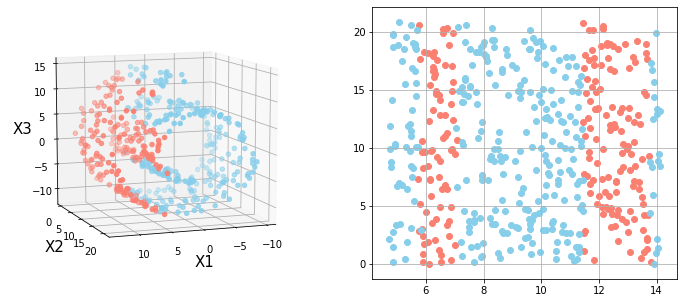

In [7]:
val = x[:,0]>5
x_o = x[val]
x_n = x[~val]

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121, projection="3d")

ax.scatter(x_o[:,0], x_o[:,1], x_o[:,2], c='salmon')
ax.scatter(x_n[:,0], x_n[:,1], x_n[:,2], c='skyblue')
ax.view_init(10,70)

ax.set_xlabel("X1", fontsize=15)
ax.set_ylabel("X2", fontsize=15)
ax.set_zlabel("X3", fontsize=15)

plt.subplot(122)
plt.scatter(y[val], x_o[:,1], c='salmon')
plt.scatter(y[~val], x_n[:,1], c='skyblue')
plt.grid(True)

#### In above image, decision boundary is simple in 3D space. However, decision boundary is more complex in spreaded manifold. ####

## 2.PCA ##
#### We should select proper hyperplane before project train set to low dimensional hyperplane. Choosing hyperplane that preserves variance at most. ####

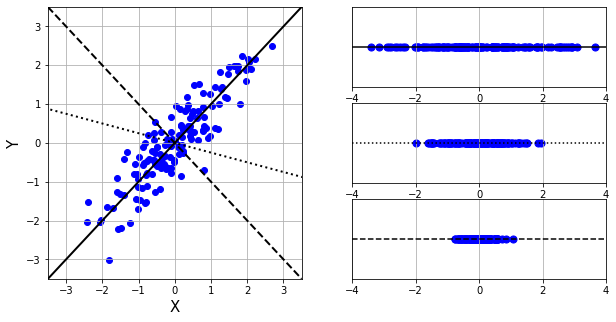

In [8]:
np.random.seed(119)
x = np.random.randn(150)
y = x + 0.5*np.random.randn(150)

plt.figure(figsize=(10,5))

plt.subplot2grid((3,2),(0,0), rowspan=3)
plt.axis([-3.5,3.5,-3.5,3.5]); plt.xlabel("X", fontsize=15); plt.ylabel("Y", fontsize=15)
plt.scatter(x,y, c="b")
plt.plot([-3.5,3.5], [-3.5,3.5], c="black", linewidth=2)
plt.plot([-3.5,3.5], [3.5,-3.5], c="black", linestyle='--', linewidth=2)
plt.plot([-4,4], [1,-1], c="black", linestyle='dotted', linewidth=2)
plt.grid(True)

def projection(vectoron):
    norm = np.sqrt(vectoron[0]**2 + vectoron[1]**2)
    dot = np.dot(vectoron,[x,y])
    pro_scale = dot/norm
    return pro_scale

plt.subplot2grid((3,2),(0,1))
plt.xlim(-4,4); plt.xticks((-4,-2,0,2,4)); plt.grid(True)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
a = projection((1,1))
plt.plot([-4,4], [0,0], c="black")
plt.scatter(a, np.zeros(a.shape), c="b", s=50)


plt.subplot2grid((3,2),(1,1))
plt.xlim(-4,4); plt.xticks((-4,-2,0,2,4)); plt.grid(True)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
c = projection((-4,1))
plt.plot([-4,4], [0,0], c="black", linestyle='dotted')
plt.scatter(c, np.zeros(c.shape), c="b", s=50)


plt.subplot2grid((3,2),(2,1))
plt.xlim(-4,4); plt.xticks((-4,-2,0,2,4)); plt.grid(True)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
b = projection((1,-1))
plt.plot([-4,4], [0,0], c="black", linestyle='--')
plt.scatter(b, np.zeros(b.shape), c="b", s=50)

#### It seems that choosing vector which preserves variable at most makes loss of data's information to minimal. PCA searches axis that maximize variance of train set. That is the first PC(principal component). And PCA finds second axis that orthogonla with previous PC and maximally preserves variance. In this way, other axes are searched. ####
#### SVD is a useful method to search PC of train set. SVD devides train set matrix $X$ into dot product of three matrices $U\Sigma V^T$. PC we want to find is in $V$. ####

## $\mathrm{V} =[\mathbf{c_1\ c_2}\cdots\ \mathbf{c_n}] $ ##

In [9]:
np.random.seed(119)
x = np.random.randn(100)
y = x**2 + np.random.randn(100)
z = x + 0.3*y + np.random.randn(100)
xyz = np.concatenate((x.reshape(-1,1), y.reshape(-1,1), z.reshape(-1,1)), axis=1)
xyz_scaled = xyz - xyz.mean(axis=0)

u, sigma, vt = np.linalg.svd(xyz_scaled)
c1 = vt.T[:,0]
c2 = vt.T[:,1]
print(c1, c2)

[-0.26003984 -0.70847378 -0.65608245] [ 0.52973712 -0.67275151  0.51651137]


#### We can change dataset to n-dimensional space by projecting to subspace defined by first n number of PCs. ####
## $\mathrm{X}_{d-proj}=\mathrm{XW}_d \quad (\mathrm{W}_d$ is first dth row of $\mathrm{V}$  ) ##

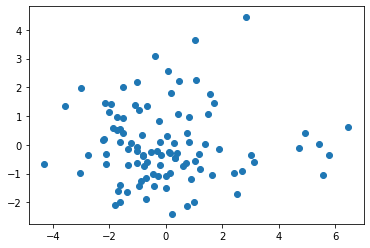

In [10]:
W2 = vt.T[:,:2]
x_proj2 = xyz_scaled.dot(W2)
plt.scatter(-x_proj2[:,0], -x_proj2[:,1])

#### scikit-learn's PCA function works same with above process. And it automatically proceeds standardization. ####

[[ 0.26003984  0.70847378  0.65608245]
 [-0.52973712  0.67275151 -0.51651137]]


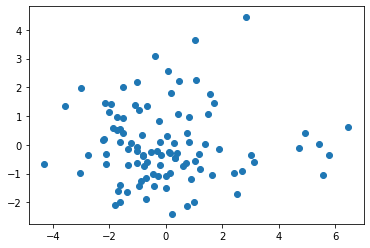

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
x_proj2 = pca.fit_transform(xyz)
plt.scatter(x_proj2[:,0], x_proj2[:,1])
print(pca.components_)

#### Explained variance ratio is one of useful imfornmation. According to under code, about 66% of variance is explained by first PC. And about 27% of variance is explained by second PC. ####

In [12]:
pca.explained_variance_ratio_

array([0.66374871, 0.27219841])

#### To choose number of dimension, adding PCs until sufficent variance explained is simple.  ####

In [13]:
pca = PCA()
pca.fit(xyz)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum > 0.8) + 1
d

2

In [14]:
pca = PCA(n_components=0.8)
pca.fit_transform(xyz)
pca.explained_variance_ratio_

array([0.66374871, 0.27219841])

In [15]:
mnist_data = pd.read_csv("train.csv", header=0)
mnist_data = mnist_data.drop('label', axis=1)
mnist_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


87

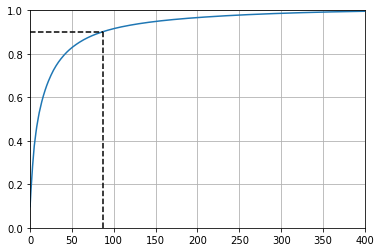

In [16]:
pca = PCA()
pca.fit(mnist_data)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.axis([0,400,0,1]) ; plt.grid(True)
plt.plot(range(len(cumsum)), cumsum)

pca = PCA(n_components=0.9)
pca.fit(mnist_data)
suum = pca.explained_variance_ratio_.sum()
d = len(pca.explained_variance_ratio_)
plt.plot([0,d], [suum, suum], c="black", linestyle="--")
plt.plot([d,d], [0,suum], c="black", linestyle="--")
d

#### Scale of train set is reduced after dimensional reduction. Through above code, we can reduce number of features to 88 and sclae of trainset to about 10%.(with maintaining 90% of variance) And we can reverse PCA at compressed data get 784 dimensional data. This may be simillar to raw data. Reconstruction error is MSE of raw data and reconstructed data. ####
## $ \mathrm{X}_{recovered} = \mathrm{X}_{d-proj}\mathrm{W}_d^T $ ##

In [17]:
mnist_reduced = pca.transform(mnist_data)
mnist_recover = pca.inverse_transform(mnist_reduced)

Text(0.0, 1.0, 'recovered')

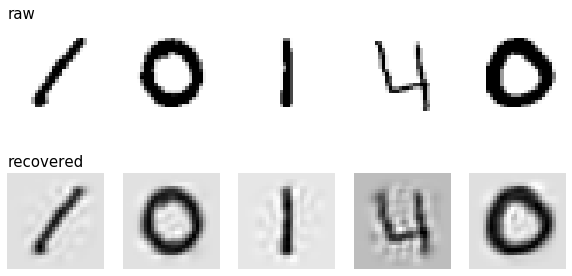

In [18]:
figure, (axes) = plt.subplots(nrows=2, ncols=5, figsize=(10,5))

for l in range(5):
    an_image = mnist_data.iloc[l].values.reshape(28,28)
    axes[0][l].imshow(an_image, cmap = 'binary')
    axes[0][l].axis("off")

for l in range(5):
    an_image = mnist_recover[l].reshape(28,28)
    axes[1][l].imshow(an_image, cmap = 'binary')
    axes[1][l].axis("off")

axes[0][0].set_title("raw", loc='left', fontsize=15)
axes[1][0].set_title("recovered", loc='left', fontsize=15)

#### When we set *svd_solver* to "randomized", scikit-learn applies randomized PCA and quickly searches approximation of PCs. ####

In [19]:
rnd_pca = PCA(n_components=88, svd_solver="randomized")
rnd_pca.fit(mnist_data)

PCA(n_components=88, svd_solver='randomized')

#### Idea of kernel trick, linear boundary in high dimensional space corresponds to unlinear boundary in original space, is able to be applied at PCA. This method is kernel PCA. It's useful at maintaining cluster of sample or spreading manifold. ####

In [103]:
from sklearn.decomposition import KernelPCA

x,y = make_swiss_roll(n_samples=1000, noise=0.1)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
x_rbf_pca = rbf_pca.fit_transform(x)

Text(0.5, 1.0, 'sigmoid')

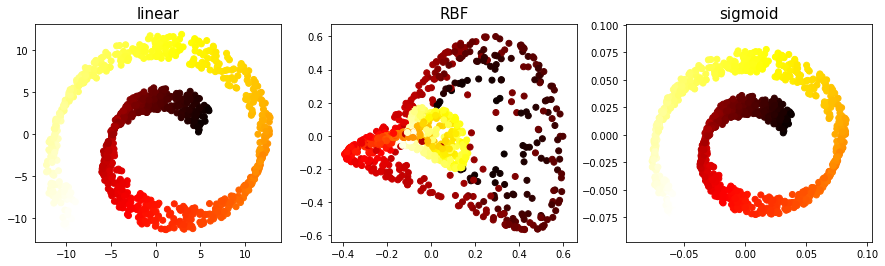

In [104]:
linear_pca = KernelPCA(n_components=2, kernel='linear', gamma=0.04)
sigmoid_pca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.0001)

x_linear_pca = linear_pca.fit_transform(x)
x_sigmoid_pca = sigmoid_pca.fit_transform(x)

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,4))

ax1.scatter(x_linear_pca[:,0], x_linear_pca[:,1], c=y, cmap=plt.cm.hot)
ax1.set_title("linear", fontsize=15)

ax2.scatter(x_rbf_pca[:,0], x_rbf_pca[:,1], c=y, cmap=plt.cm.hot)
ax2.set_title("RBF", fontsize=15)

ax3.scatter(x_sigmoid_pca[:,0], x_sigmoid_pca[:,1], c=y, cmap=plt.cm.hot)
ax3.set_title("sigmoid", fontsize=15)

#### Choosing best kernel and hyperparameter is not easy problem beacause there isn't clear preformance measurement criteria. However, we can choose kernel and hyperparameter that have best score at given problem. ####

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("pca", KernelPCA(n_components=2)),
    ("logis", LinearRegression())
])

param = [{"pca__kernel": ["rbf", "sigmoid", "linear"] ,
          "pca__gamma" : np.linspace(0.01, 0.05, 10)
         }]

grid_search = GridSearchCV(clf, param, cv=5)
grid_search.fit(x, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', KernelPCA(n_components=2)),
                                       ('logis', LinearRegression())]),
             param_grid=[{'pca__gamma': array([0.01      , 0.01444444, 0.01888889, 0.02333333, 0.02777778,
       0.03222222, 0.03666667, 0.04111111, 0.04555556, 0.05      ]),
                          'pca__kernel': ['rbf', 'sigmoid', 'linear']}])

In [106]:
print(grid_search.best_params_)

{'pca__gamma': 0.05, 'pca__kernel': 'rbf'}


#### As complete un-supervised way, using reconstruction error can be a useful method. ####

In [107]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.05, fit_inverse_transform=True)
x_reduced = rbf_pca.fit_transform(x)
x_reconstruct = rbf_pca.inverse_transform(x_reduced)

In [108]:
from sklearn.metrics import mean_squared_error
mean_squared_error(x,x_reconstruct)

1.1690285300388549e-26

## 3.LLE ##
#### LLE is another nonlinear dimensionality reduction. It estimates how each sample is linearly related to closest neighbor. And searches low dimensional expression of train set that preserves local relation at most. It works well in modeling manifold. ####

In [117]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=11)
x_reduced = lle.fit_transform(x)

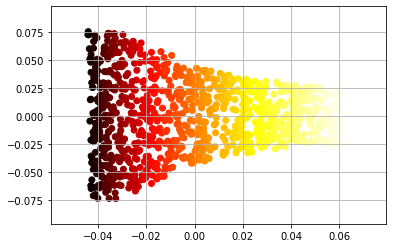

In [118]:
plt.grid(True)
plt.scatter(x_reduced[:,0], x_reduced[:,1], c=y, cmap=plt.cm.hot)